## 1. Install and import Python libraries

### What is pandas? 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [2150]:
!pip install --upgrade pandas

In [2151]:
import pandas as pd
pd.__version__

'1.2.4'

In [2152]:
import os, types
import io, requests
from datetime import datetime

In [2153]:
import matplotlib.pyplot as plt

### 2.1 Import dataset


In [2154]:
electricity_weather_hourly_df = pd.read_csv("east_electricity_weather_history.csv")
electricity_weather_hourly_df

,index,East,tempF,windspeedMiles,precipMM,humidity,visibilityMiles,pressureInches,cloudcover,HeatIndexF,DewPointF,WindChillF,WindGustMiles,FeelsLikeF,uvIndex
0,2008-07-01 00:00:00,1221.128539,66.0,2.0,0.0,69.0,6.0,31.0,6.0,66.0,56.0,66.0,5.0,66.0,5.0
1,2008-07-01 01:00:00,1172.281951,66.0,2.0,0.0,69.0,6.0,31.0,6.0,66.0,56.0,66.0,5.0,66.0,5.0
2,2008-07-01 02:00:00,1130.034847,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
3,2008-07-01 03:00:00,1088.946217,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
4,2008-07-01 04:00:00,1126.681443,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113213,2021-06-01 18:00:00,1861.590000,69.0,5.0,0.3,93.0,2.0,30.0,51.0,71.0,67.0,69.0,10.0,69.0,1.0
113214,2021-06-01 19:00:00,1823.850000,69.0,5.0,0.3,93.0,2.0,30.0,51.0,71.0,67.0,69.0,10.0,69.0,1.0
113215,2021-06-01 20:00:00,1780.920000,68.0,6.0,0.1,96.0,0.0,30.0,80.0,68.0,67.0,68.0,12.0,68.0,1.0
113216,2021-06-01 21:00:00,1645.420000,68.0,6.0,0.1,96.0,0.0,30.0,80.0,68.0,67.0,68.0,12.0,68.0,1.0


#  Session 2 - Time Series Forecasting using TensorFlow 2 in Python with RNN and LSTMs


## What is an Artificial Neural Network?  

Neural networks are computational structures that map an input to an output based on a network of highly connected processing elements (neurons).  

![ANN](https://developer.ibm.com/developer/default/articles/an-introduction-to-deep-learning/images/deep-neural-network.jpg)



<a id="top"></a>
### Table of Contents

1. [Data exploration - a refresher](#load_libraries)
1. [Prepare dataset for model training](#load_data)
1. [Build, test and evaluate time series forecasting model using Tensorflow and Keras](#prepare_data)



## 1. Data exploration - a refresher

#### Next we verify that none of the entries in the *index* coulmn is missing or is repeating

In [2155]:
print('Number of entries within the input dataframe : ',len(electricity_weather_hourly_df))

print('Numbr of unique time entries in input dataframe: ',len(pd.unique(electricity_weather_hourly_df['index'])))

Number of entries within the input dataframe :  113218
Numbr of unique time entries in input dataframe:  113218


In [2156]:
electricity_weather_hourly_df.head(14)

,index,East,tempF,windspeedMiles,precipMM,humidity,visibilityMiles,pressureInches,cloudcover,HeatIndexF,DewPointF,WindChillF,WindGustMiles,FeelsLikeF,uvIndex
0,2008-07-01 00:00:00,1221.128539,66.0,2.0,0.0,69.0,6.0,31.0,6.0,66.0,56.0,66.0,5.0,66.0,5.0
1,2008-07-01 01:00:00,1172.281951,66.0,2.0,0.0,69.0,6.0,31.0,6.0,66.0,56.0,66.0,5.0,66.0,5.0
2,2008-07-01 02:00:00,1130.034847,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
3,2008-07-01 03:00:00,1088.946217,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
4,2008-07-01 04:00:00,1126.681443,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
5,2008-07-01 05:00:00,1186.545158,93.0,4.0,0.0,31.0,6.0,31.0,14.0,93.0,58.0,93.0,4.0,93.0,8.0
6,2008-07-01 06:00:00,1236.382142,93.0,4.0,0.0,31.0,6.0,31.0,14.0,93.0,58.0,93.0,4.0,93.0,8.0
7,2008-07-01 07:00:00,1316.717169,93.0,4.0,0.0,31.0,6.0,31.0,14.0,93.0,58.0,93.0,4.0,93.0,8.0
8,2008-07-01 08:00:00,1456.726807,93.0,6.0,0.0,31.0,6.0,30.0,13.0,93.0,58.0,93.0,6.0,93.0,8.0
9,2008-07-01 09:00:00,1570.106870,93.0,6.0,0.0,31.0,6.0,30.0,13.0,93.0,58.0,93.0,6.0,93.0,8.0


In [2157]:
electricity_weather_hourly_df[['index']].duplicated().sum()

0

In [2158]:
electricity_weather_hourly_df[['index']].loc[electricity_weather_hourly_df[['index']].duplicated(),:]

,index


In [2159]:
electricity_weather_hourly_df.shape

(113218, 15)

In [2160]:
electricity_weather_hourly_df.tail(2)

,index,East,tempF,windspeedMiles,precipMM,humidity,visibilityMiles,pressureInches,cloudcover,HeatIndexF,DewPointF,WindChillF,WindGustMiles,FeelsLikeF,uvIndex
113216,2021-06-01 21:00:00,1645.42,68.0,6.0,0.1,96.0,0.0,30.0,80.0,68.0,67.0,68.0,12.0,68.0,1.0
113217,2021-06-01 22:00:00,1534.01,68.0,6.0,0.1,96.0,0.0,30.0,80.0,68.0,67.0,68.0,12.0,68.0,1.0


### For dropping duplicated rows!

In [2163]:
#electricity_weather_hourly_df.drop_duplicates(subset ="index",keep = 'first', inplace = True)

In [2164]:
#electricity_weather_hourly_df = coast_electricity_weather_hourly_df.reset_index()          # This code resets the index!

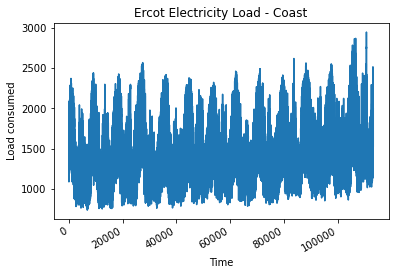

In [2165]:
plt.figure(1)
plt.plot(electricity_weather_hourly_df['East'])
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - Coast')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

#### We then perform a sanity check to understand the range of values that are present within our dataset

In [2166]:
pd.concat([electricity_weather_hourly_df.head(1), electricity_weather_hourly_df.tail(1)])

,index,East,tempF,windspeedMiles,precipMM,humidity,visibilityMiles,pressureInches,cloudcover,HeatIndexF,DewPointF,WindChillF,WindGustMiles,FeelsLikeF,uvIndex
0,2008-07-01 00:00:00,1221.128539,66.0,2.0,0.0,69.0,6.0,31.0,6.0,66.0,56.0,66.0,5.0,66.0,5.0
113217,2021-06-01 22:00:00,1534.010000,68.0,6.0,0.1,96.0,0.0,30.0,80.0,68.0,67.0,68.0,12.0,68.0,1.0


#### By executing the cell below, we understand that the last 30 entries of the dataset contains 6 hours of data from yesterday and 24 hours of data from day before yesterday.

In [2167]:
electricity_weather_hourly_df.tail(30)

,index,East,tempF,windspeedMiles,precipMM,humidity,visibilityMiles,pressureInches,cloudcover,HeatIndexF,DewPointF,WindChillF,WindGustMiles,FeelsLikeF,uvIndex
113188,2021-05-31 17:00:00,1932.74,67.0,6.0,0.0,87.0,6.0,31.0,48.0,67.0,63.0,67.0,14.0,67.0,1.0
113189,2021-05-31 18:00:00,1948.37,67.0,6.0,0.0,87.0,6.0,31.0,48.0,67.0,63.0,67.0,14.0,67.0,1.0
113190,2021-05-31 19:00:00,1889.79,67.0,6.0,0.0,87.0,6.0,31.0,48.0,67.0,63.0,67.0,14.0,67.0,1.0
113191,2021-05-31 20:00:00,1830.92,66.0,6.0,0.0,92.0,2.0,31.0,41.0,66.0,64.0,66.0,13.0,66.0,1.0
113192,2021-05-31 21:00:00,1720.48,66.0,6.0,0.0,92.0,2.0,31.0,41.0,66.0,64.0,66.0,13.0,66.0,1.0
113193,2021-05-31 22:00:00,1588.06,66.0,6.0,0.0,92.0,2.0,31.0,41.0,66.0,64.0,66.0,13.0,66.0,1.0
113194,2021-05-31 23:00:00,1512.48,65.0,6.0,0.0,95.0,1.0,31.0,29.0,65.0,64.0,65.0,12.0,65.0,4.0
113195,2021-06-01 00:00:00,1437.10,65.0,6.0,0.0,95.0,1.0,31.0,29.0,65.0,64.0,65.0,12.0,65.0,4.0
113196,2021-06-01 01:00:00,1395.66,65.0,6.0,0.0,95.0,1.0,31.0,29.0,65.0,64.0,65.0,12.0,65.0,4.0
113197,2021-06-01 02:00:00,1357.34,72.0,8.0,0.0,81.0,4.0,31.0,17.0,74.0,65.0,72.0,11.0,74.0,5.0


## 2. Prepare data  for model building

### 2.1 Drop numpy incompatible column - *index*

Since data will be changed back and forth between numpy and pandas, we remove the *index* column to eliminate any datetime related confusion that may arise.

In [2168]:
electricity_weather = electricity_weather_hourly_df.drop(['index'], axis=1)

In [2169]:
electricity_weather

,East,tempF,windspeedMiles,precipMM,humidity,visibilityMiles,pressureInches,cloudcover,HeatIndexF,DewPointF,WindChillF,WindGustMiles,FeelsLikeF,uvIndex
0,1221.128539,66.0,2.0,0.0,69.0,6.0,31.0,6.0,66.0,56.0,66.0,5.0,66.0,5.0
1,1172.281951,66.0,2.0,0.0,69.0,6.0,31.0,6.0,66.0,56.0,66.0,5.0,66.0,5.0
2,1130.034847,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
3,1088.946217,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
4,1126.681443,85.0,2.0,0.0,42.0,6.0,31.0,10.0,85.0,59.0,85.0,3.0,85.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113213,1861.590000,69.0,5.0,0.3,93.0,2.0,30.0,51.0,71.0,67.0,69.0,10.0,69.0,1.0
113214,1823.850000,69.0,5.0,0.3,93.0,2.0,30.0,51.0,71.0,67.0,69.0,10.0,69.0,1.0
113215,1780.920000,68.0,6.0,0.1,96.0,0.0,30.0,80.0,68.0,67.0,68.0,12.0,68.0,1.0
113216,1645.420000,68.0,6.0,0.1,96.0,0.0,30.0,80.0,68.0,67.0,68.0,12.0,68.0,1.0


### 2.2 Split data into training and test set 

We now split the dataset into training and test sets. 

#### We include all entries except the last 30 entries in the training set. 

In [2170]:
training_data =  electricity_weather.iloc[:-30]

In [2171]:
print(len(training_data))

113188


#### We will eventually use the last 30 entries for evaluating the model. But we include an extra 24 rows to accomodate for calculating the timesteps. More details on it below.

In [2172]:
test_data = electricity_weather.iloc[-54:]

In [2173]:
print(len(test_data))

54


### 2.3 Feature scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. (source : https://en.wikipedia.org/wiki/Feature_scaling)


In this section we use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from the scikit-learn's preprocessing API

In [2174]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [2175]:
training_data_scaled = min_max_scaler.fit_transform(training_data)

training_data_scaled = pd.DataFrame(training_data_scaled)

print('Value of training data : ' + str(training_data_scaled))

Value of training data :               0         1     2    3         4    5    6     7         8   \
0       0.218542  0.603448  0.08  0.0  0.643678  1.0  1.0  0.06  0.564516   
1       0.196453  0.603448  0.08  0.0  0.643678  1.0  1.0  0.06  0.564516   
2       0.177348  0.767241  0.08  0.0  0.333333  1.0  1.0  0.10  0.717742   
3       0.158767  0.767241  0.08  0.0  0.333333  1.0  1.0  0.10  0.717742   
4       0.175832  0.767241  0.08  0.0  0.333333  1.0  1.0  0.10  0.717742   
...          ...       ...   ...  ...       ...  ...  ...   ...       ...   
113183  0.541754  0.689655  0.28  0.0  0.724138  1.0  1.0  0.23  0.669355   
113184  0.563284  0.689655  0.28  0.0  0.724138  1.0  1.0  0.23  0.669355   
113185  0.588278  0.646552  0.24  0.0  0.827586  1.0  1.0  0.15  0.612903   
113186  0.584583  0.646552  0.24  0.0  0.827586  1.0  1.0  0.15  0.612903   
113187  0.594039  0.646552  0.24  0.0  0.827586  1.0  1.0  0.15  0.612903   

              9         10        11        12    

In [2176]:
training_data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.218542,0.603448,0.08,0.0,0.643678,1.0,1.0,0.06,0.564516,0.744898,0.640625,0.108696,0.602941,0.444444
1,0.196453,0.603448,0.08,0.0,0.643678,1.0,1.0,0.06,0.564516,0.744898,0.640625,0.108696,0.602941,0.444444
2,0.177348,0.767241,0.08,0.0,0.333333,1.0,1.0,0.10,0.717742,0.775510,0.789062,0.065217,0.742647,0.666667
3,0.158767,0.767241,0.08,0.0,0.333333,1.0,1.0,0.10,0.717742,0.775510,0.789062,0.065217,0.742647,0.666667
4,0.175832,0.767241,0.08,0.0,0.333333,1.0,1.0,0.10,0.717742,0.775510,0.789062,0.065217,0.742647,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113183,0.541754,0.689655,0.28,0.0,0.724138,1.0,1.0,0.23,0.669355,0.867347,0.718750,0.217391,0.698529,0.000000
113184,0.563284,0.689655,0.28,0.0,0.724138,1.0,1.0,0.23,0.669355,0.867347,0.718750,0.217391,0.698529,0.000000
113185,0.588278,0.646552,0.24,0.0,0.827586,1.0,1.0,0.15,0.612903,0.846939,0.679688,0.282609,0.639706,0.000000
113186,0.584583,0.646552,0.24,0.0,0.827586,1.0,1.0,0.15,0.612903,0.846939,0.679688,0.282609,0.639706,0.000000


In [2177]:
#training_data_scaled.5.unique()
pd.unique(training_data_scaled[5])

array([1.        , 0.83333333, 0.5       , 0.66666667, 0.        ,
       0.16666667, 0.33333333])

In [2178]:
print(training_data_scaled[5].where(training_data_scaled[5] == 0.66666667))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
113183   NaN
113184   NaN
113185   NaN
113186   NaN
113187   NaN
Name: 5, Length: 113188, dtype: float64


In [2179]:
test_data_scaled = min_max_scaler.transform(test_data)

test_data_scaled = pd.DataFrame(test_data_scaled)

print('Value of test data : ' + str(test_data_scaled))

Value of test data :           0         1     2         3         4         5    6     7   \
0   0.493503  0.586207  0.28  0.000000  0.747126  1.000000  1.0  0.10   
1   0.459351  0.586207  0.28  0.000000  0.747126  1.000000  1.0  0.10   
2   0.443963  0.586207  0.28  0.000000  0.747126  1.000000  1.0  0.10   
3   0.427479  0.568966  0.24  0.000000  0.735632  1.000000  1.0  0.16   
4   0.373155  0.568966  0.24  0.000000  0.735632  1.000000  1.0  0.16   
5   0.320404  0.568966  0.24  0.000000  0.735632  1.000000  1.0  0.16   
6   0.254317  0.560345  0.28  0.000000  0.793103  1.000000  1.0  0.27   
7   0.217679  0.560345  0.28  0.000000  0.793103  1.000000  1.0  0.27   
8   0.199410  0.560345  0.28  0.000000  0.793103  1.000000  1.0  0.27   
9   0.199315  0.594828  0.32  0.000000  0.747126  1.000000  1.0  0.19   
10  0.181090  0.594828  0.32  0.000000  0.747126  1.000000  1.0  0.19   
11  0.194395  0.594828  0.32  0.000000  0.747126  1.000000  1.0  0.19   
12  0.214057  0.663793  0.32  

### 2.4 Separate data into dependant and independant variables

We now split the training data into X_train to represent the dependent variables and y_train to represent the independent variable

In [2180]:
X_train =  pd.DataFrame(training_data_scaled[[1,2,3,4,5,6,7,8,9,10,11,12,13]])
y_train =  pd.DataFrame(training_data_scaled[0])

In [2181]:
print(X_train.shape, y_train.shape)

(113188, 13) (113188, 1)


We then repeat the same steps for the test data

In [2182]:
X_test =  pd.DataFrame(test_data_scaled[test_data_scaled.columns[1:14]])
#X_test =  pd.DataFrame(test_data_scaled[[1,2,3,4,5,6,7,8,9,10,11,12,13]])
y_test =  pd.DataFrame(test_data_scaled[0])

In [2183]:
print(X_test.shape, y_test.shape)

(54, 13) (54, 1)


In [2184]:
#print('Y values were scaled by multiplying by {:.10f} and adding {:.4f}'.format(test_data_scaled_.scale_[0],test_data_scaled_.min_[0]))

### 2.5  Modify shape of train and test sets to include time steps

### What is Recurrent Neural Network ?

A recurrent neural network (RNN) is a class of neural networks that includes weighted connections within a layer (compared with traditional feed-forward networks, where connects feed only to subsequent layers). Because RNNs include loops, they can store information while processing new input. This memory makes them ideal for processing tasks where prior inputs must be considered (such as time-series data). 

![RNN](https://developer.ibm.com/developer/default/articles/cc-machine-learning-deep-learning-architectures/images/figure03.png)

#### Let's take a look at an example of data is expanded to include time steps history

| Electricity_Load  |
| -----:|
| 1345 |
     |   1456 |
 |    1444 |
  |    2000 |
   |    1245 |
   
   
   Let's assume time_step = 2
   
   | T1        | T2           | Electricity_Load  |
| ------------- |:-------------:| -----:|
| NA      | NA | 1345 |
|NA      | 1345      |   1456 |
| 1345 | 1456     |    1444 |
| 1456 | 1444     |    2000 |
|1444 | 2000      |    1245 |


In [2185]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
        if(i%10000==0):
            print('i = ',i)
            print('i + time_steps = ',i+time_steps)
        
    return np.array(Xs), np.array(ys)

In [2186]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train_steps, y_train_steps = create_dataset(X_train, y_train, time_steps)



i =  0
i + time_steps =  24
i =  10000
i + time_steps =  10024
i =  20000
i + time_steps =  20024
i =  30000
i + time_steps =  30024
i =  40000
i + time_steps =  40024
i =  50000
i + time_steps =  50024
i =  60000
i + time_steps =  60024
i =  70000
i + time_steps =  70024
i =  80000
i + time_steps =  80024
i =  90000
i + time_steps =  90024
i =  100000
i + time_steps =  100024
i =  110000
i + time_steps =  110024


In [2187]:
print(X_train_steps.shape, y_train_steps.shape)

(113164, 24, 13) (113164, 1)


In [2188]:
X_test_steps, y_test_steps = create_dataset(X_test, y_test, time_steps)

i =  0
i + time_steps =  24


In [2189]:
print(X_test.shape, y_test.shape)

(54, 13) (54, 1)


In [2190]:
print(X_test_steps.shape, y_test_steps.shape)

(30, 24, 13) (30, 1)


## 3. Build, test and evaluate time series forecasting model using Tensorflow and Keras

### What is Long Short Term Memory? 

The LSTM departed from typical neuron-based neural network architectures and instead introduced the concept of a memory cell. The memory cell can retain its value for a short or long time as a function of its inputs, which allows the cell to remember what’s important and not just its last computed value.

The LSTM memory cell contains three gates that control how information flows into or out of the cell. The input gate controls when new information can flow into the memory. The forget gate controls when an existing piece of information is forgotten, allowing the cell to remember new data. Finally, the output gate controls when the information that is contained in the cell is used in the output from the cell. The cell also contains weights, which control each gate. The training algorithm, commonly BPTT, optimizes these weights based on the resulting network output error.

![LSTM](https://developer.ibm.com/developer/default/articles/cc-machine-learning-deep-learning-architectures/images/figure04.png)

### 3.1 Import required tensorflow packages

### What is TensorFlow? 

TensorFlow is an open source deep learning framework that was released in late 2015 under the Apache 2.0 license. Since then, it has become one of the most widely adopted deep learning frameworks in the world (going by the number of GitHub projects based on it).

![TFVSKS](https://developer.ibm.com/developer/default/articles/compare-deep-learning-frameworks/images/tfvsk.png)


In [2191]:
#pip install tensorflow

In [2192]:
#conda install tensorflow

In [2193]:
import numpy as np

In [2194]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

### 3.2 Initialize keras model and LSTM and Dense layer

In [2195]:
# which means that the number of time steps is 24
X_train_steps.shape[1]

24

In [2196]:
# which means that the number of input units is 13
X_train_steps.shape[2]

13

In [2197]:
model = Sequential()

model.add(LSTM(units=15,input_shape=(X_train_steps.shape[1], X_train_steps.shape[2])))
model.add(tf.keras.layers.Dense(units=15))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.001))
#model.compile(loss='root_mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.001))

In [2198]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 15)                1740      
_________________________________________________________________
dense_59 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 16        
Total params: 1,996
Trainable params: 1,996
Non-trainable params: 0
_________________________________________________________________


## To make the randomness predictable, we should use the concept of *seed*.

### 3.3 Fit time series model using training data 

In [2199]:
history = model.fit(
    X_train_steps[len(X_train_steps)-500:len(X_train_steps),:], y_train_steps[len(y_train_steps)-500:len(y_train_steps)],
    epochs=100,
    batch_size=2,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/100
225/225 [==============================] - 5s 10ms/step - loss: 0.0124 - val_loss: 0.0156
Epoch 2/100
225/225 [==============================] - 1s 6ms/step - loss: 0.0085 - val_loss: 0.0182
Epoch 3/100
225/225 [==============================] - 1s 7ms/step - loss: 0.0056 - val_loss: 0.0130
Epoch 4/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 0.0113
Epoch 5/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0045 - val_loss: 0.0102
Epoch 6/100
225/225 [==============================] - 1s 7ms/step - loss: 0.0044 - val_loss: 0.0094
Epoch 7/100
225/225 [==============================] - 1s 7ms/step - loss: 0.0041 - val_loss: 0.0088
Epoch 8/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0040 - val_loss: 0.0084
Epoch 9/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0039 - val_loss: 0.0087
Epoch 10/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0039 - val_l

225/225 [==============================] - 2s 8ms/step - loss: 0.0019 - val_loss: 0.0052
Epoch 82/100
225/225 [==============================] - 2s 8ms/step - loss: 0.0023 - val_loss: 0.0051
Epoch 83/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 84/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0020 - val_loss: 0.0098
Epoch 85/100
225/225 [==============================] - 2s 9ms/step - loss: 0.0023 - val_loss: 0.0152
Epoch 86/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0018 - val_loss: 0.0065
Epoch 87/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 88/100
225/225 [==============================] - 2s 8ms/step - loss: 0.0015 - val_loss: 0.0056
Epoch 89/100
225/225 [==============================] - 2s 8ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 90/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0014 - val_loss: 

### 3.4 Run predictions on the time series model using test data

In [2200]:
predicted_electricity_load = model.predict(X_test_steps)

In [2201]:
#print(predicted_electricity_load)

#### Notice that the predicted value is scaled to a value between 0 and 1 because of the MinMaxScaler that we applied. To reverse the value to its original scale we need to apply *inverse_transform* on the scaler object. 

But before that, we need to create a numpy array that is compatible to the original dataset on which the scaler was applied

In [2202]:
predicted_np = np.column_stack( (predicted_electricity_load , np.ones((30,6)), np.ones((30,7)) ))

In [2203]:
#type(predicted_np)

In [2204]:
#print(predicted_np.shape)

In [2205]:
predicted_electricity_load_inverse = min_max_scaler.inverse_transform(predicted_np)

In [2206]:
#predicted_electricity_load_inverse

#### We repeat the same steps to recover the original electricity load consumption of the test data

In [2207]:
actual_np = np.column_stack( (y_test_steps , np.ones((30,6)), np.ones((30,7)) ) )

In [2208]:
actual_electricity_load_inverse = min_max_scaler.inverse_transform(actual_np)

In [2209]:
#actual_electricity_load_inverse

### 3.5 Evaluate model performance by visualizing results

We will now visualize the model using matplotlib to analyze model performance. Closer the red line is to the green line, better the model performance. 

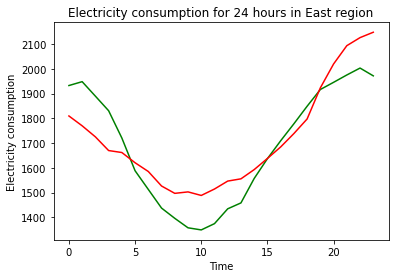

In [2210]:
plt.plot(actual_electricity_load_inverse[0:24,0], color='green', label = 'Real electricity consumption')
plt.plot(predicted_electricity_load_inverse[0:24,0], color='red', label = 'Predicted electricity consumption')
plt.title('Electricity consumption for 24 hours in East region')
plt.xlabel('Time')
plt.ylabel('Electricity consumption')
plt.show()

## Related content 

1. [Data analysis in Python using pandas](https://developer.ibm.com/tutorials/data-analysis-in-python-using-pandas/)
1. [Get started with machine learning](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/)
1. [Get started with deep learning](https://developer.ibm.com/series/get-started-with-deep-learning/)